## Diabetes prediction

In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data file
data =pd.read_csv('/content/diabetes_data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not
possible, right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove
such data or simply replace it with their respective mean values. Let's do the latter.

In [5]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to
# now replacing zero values with the mean of the column
data['BMI' ] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure' ] = data['BloodPressure' ]. replace(0,data['BloodPressure' ].mean())
data['Glucose' ] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin' ] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness' ] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


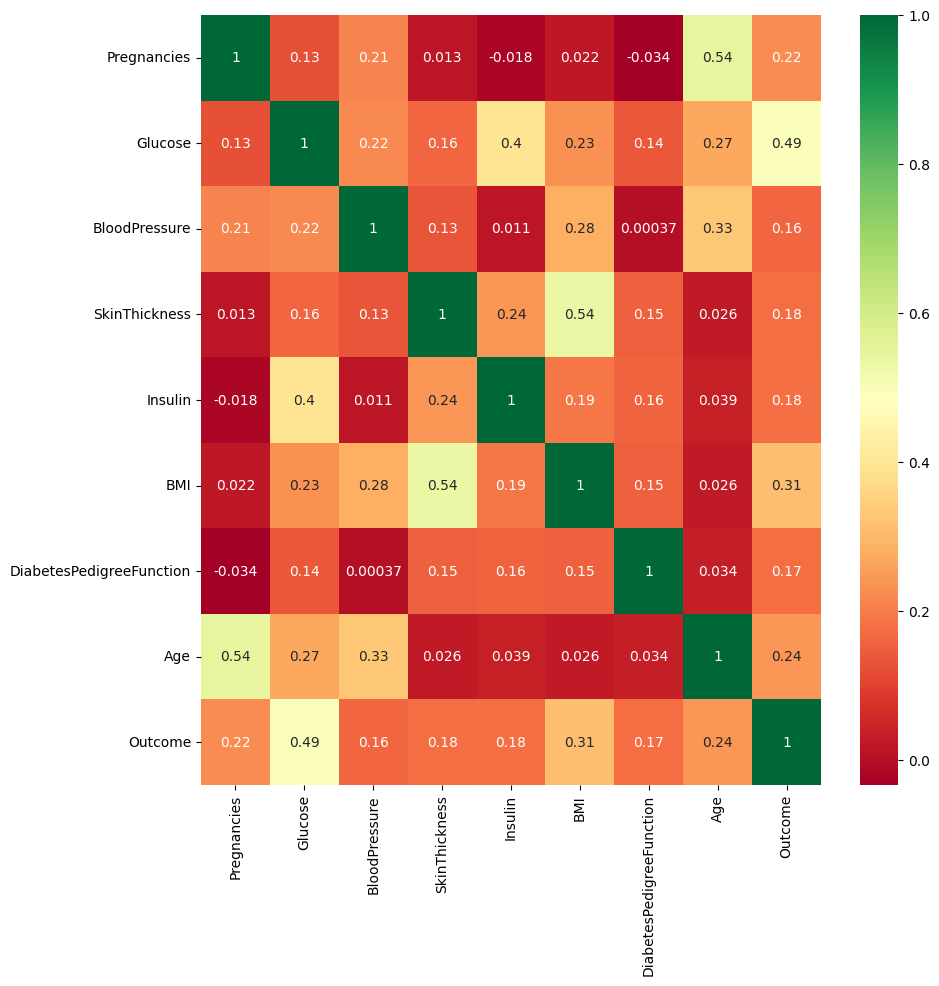

In [7]:
fig, ax =plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")
plt.show()

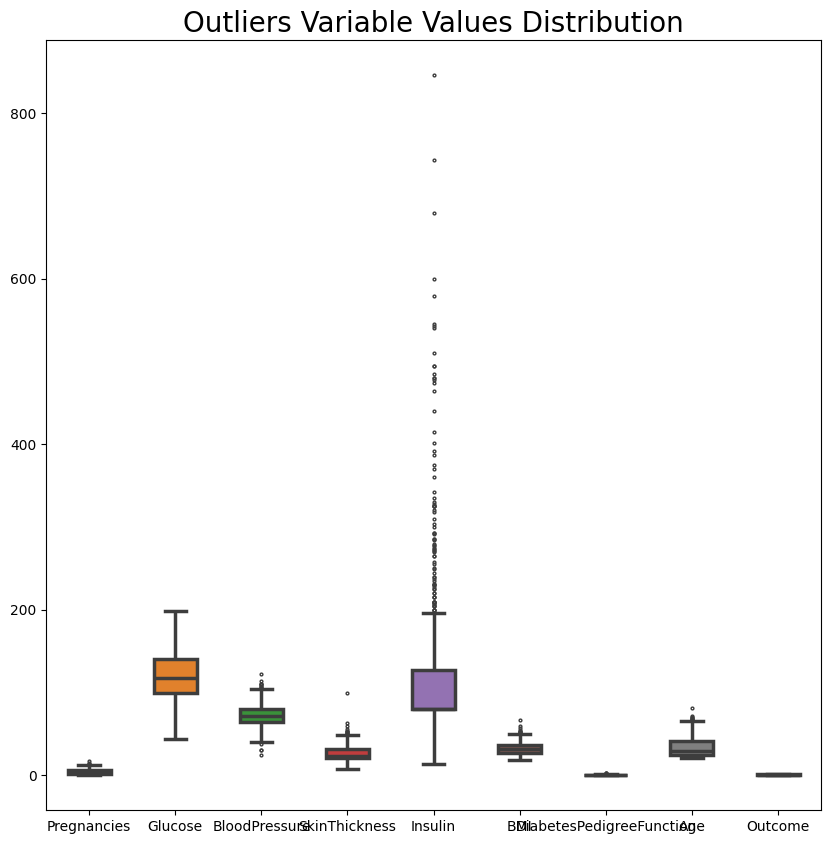

In [8]:
fig, ax =plt.subplots(figsize=(10,10))
sns.boxplot(data=data, width=0.5,ax=ax, fliersize=2, linewidth=2.5)
plt.title("Outliers Variable Values Distribution", fontsize = 20)
plt.show()

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [10]:
# Segregate the dependent and independent variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [11]:
# seperate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [12]:
import pickle
##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
  #scaling the data
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  #saving the model
  file = open('/content/standardscalar.pkl','wb')
  pickle.dump(scaler,file)
  file.close()

  return X_train_scaled, X_test_scaled


In [13]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
## Hyperparameter Tuning
## GridSearch CV
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings .filterwarnings('ignore')
# parameter grid
parameters = {
  'penalty' : ['l1','l2'],
  'C': np.logspace(-3,3,7),
  'solver' : ['newton-cg', 'lbfgs' , 'liblinear' ],

}

In [16]:
logreg= LogisticRegression()
clf = GridSearchCV(logreg,      # model
                   param_grid=parameters,   # hyperparameter
                   scoring='accuracy',    # metric for scoring
                   cv=10)   # no. of folds

clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [17]:
clf.best_params_

{'C': np.float64(1.0), 'penalty': 'l2', 'solver': 'liblinear'}

In [18]:
clf.best_score_

np.float64(0.763793103448276)

let's see how our model performs on the test set

In [19]:
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test,y_pred) accuracy

In [20]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [21]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [22]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

np.float64(0.796875)

In [23]:
Precision = true_positive/(true_positive+false_positive)
Precision

np.float64(0.9)

In [24]:
Recall = true_positive/(true_positive+false_negative)
Recall

np.float64(0.8181818181818182)

In [25]:
F1_score = 2*(Recall * Precision) / (Recall + Precision)
F1_score

np.float64(0.8571428571428572)

In [26]:
import pickle
file = open('/content/modelforprediction.pkl','wb')
pickle.dump(clf,file)
file.close()